# 네이버 뉴스 스크래핑

In [3]:
import requests

In [4]:
import lxml.html

In [5]:
import csv

In [6]:
url = 'http://news.naver.com/main/search/search.nhn?query=%BA%F2%B5%A5%C0%CC%C5%CD&ie=MS949&x=0&y=0&page={}'

In [7]:
with open('news.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 21):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

# 스크래핑된 뉴스 읽어오기

In [1]:
import csv

In [8]:
news = []
with open('news.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

In [9]:
news[0]

"\r\r\n\t\r\r\n\t\r\r\n\t이상은 기자의 Global insight[ 이상은 기자  ] 나이팅게일은 크림전쟁(1854~1856)의 군인 사망원인 가운데 감염성 질병으로 인한 사망(하늘색 부분)이 매우 많으며(오른쪽 그래프), 감염을 줄이기 위한 조치를 취한 뒤 사망률이 크게 낮아졌음(왼쪽 그래프)을 보여주기 위해 데이터를 수집·분석해 두 개의 장미꽃 형태 다이어그램을 만들었다.구글 인공지능(AI) 알파고와 이세돌 9단의 바둑 대국 이후 빅데이터에 대한 사회적 관심이 부쩍 늘어났다. 다량의 데이터를 잘 분석한 결과가 아주 뛰어난 인간이 직접 판단한 것보다 더 나을 수 있다는 점을 실감했기 때문일 것이다. ‘알파고 쇼크’를 받은 기업 최고경영자(CEO)들 가운데서도 빅데이터를 활용해 마케팅 전략을 짜보라거나 수익성 개선방안을 도출하라고 지시하는 사례가 증가하고 있다.그런데 대부분은 직원 역량 부족을 탓하며 실망하는 일이 부지기수다. 잘 보면 직원이 아니라 CEO가 데이터 기반 경영의 본질을 제대로 이해하지 못한 경우가 흔하다.따져보자. 많은 CEO가 빅데이터 관련 태스크포스(TF)를 꾸리면서 정보기술(IT) 담당 부서장 등을 책임자로 임명한다. 그는 마케팅이나 영업과 같은 부서에 고객 데이터를 비롯해 여러 자료를 요청해 보지만 통일성이 없거나 오래된 엑셀파일 뭉치를 받는 일이 흔하다. 의미 있는 데이터를 실시간으로, 통일성 있게, 충분한 양을 확보하려면 현업부서에서 적극적으로 시간과 노력을 들여 협조해야 하는데, 대개는 ‘남의 일’일 뿐이다.전문가도 없고, 예산도 배정되지 않는다. 외부에 일을 맡겨 보려 해도 목표와 방향이 뚜렷하지 않은 프로젝트라 지시가 갈팡질팡한다. 화려한 파워포인트 보고서와 달리 알맹이는 부실하다. 빅데이터를 활용하는 기반을 갖추자고 해서 정보를 입력할 수 있는 칸이 잔뜩 있는 무슨 온라인 플랫폼을 만든다. 그러나 현장에선 시간과 노력을 투자할 이유를 못 느낀다. 용두사미로 끝난다. CEO의 실망은 더 커진다.문제는 ‘빅’데

# 형태소 분석기

In [15]:
from konlpy.tag import Twitter

In [16]:
tagger = Twitter()

# Term-Document Matrix 만들기

[CountVectorizer 문서](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [19]:
tdf = cv.fit_transform(news)

In [21]:
tdf

<213x50 sparse matrix of type '<class 'numpy.int64'>'
	with 4610 stored elements in Compressed Sparse Row format>

In [24]:
tdf.todense() # 화면에 표현 가능하도록 형태 변환

matrix([[ 1,  0,  4, ...,  1,  0,  0],
        [ 2,  1,  3, ...,  3,  0,  0],
        [ 3,  4,  3, ...,  2,  0,  0],
        ..., 
        [ 0,  0,  0, ...,  1,  0,  0],
        [ 0,  0, 37, ...,  1,  0,  0],
        [ 0,  0,  8, ...,  0,  0,  0]], dtype=int64)

# 단어 목록

In [25]:
words = cv.get_feature_names()

In [26]:
words

['개',
 '거래',
 '것',
 '결과',
 '고객',
 '기반',
 '기술',
 '기업',
 '기자',
 '날',
 '년',
 '뉴스',
 '뉴시스',
 '단계',
 '대상자',
 '대해',
 '데이터',
 '등',
 '만',
 '매우',
 '멜론',
 '명',
 '및',
 '복지',
 '분석',
 '빅데이터',
 '산업',
 '상품',
 '서비스',
 '서울',
 '세상',
 '수',
 '수준',
 '시',
 '시장',
 '심리',
 '억원',
 '월',
 '이',
 '일',
 '전',
 '정보',
 '종목',
 '지수',
 '지원',
 '최근',
 '통해',
 '투자',
 '티켓',
 '팁코']

# 한 글자 짜리 단어 빼기

In [27]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [28]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [29]:
tdf = cv.fit_transform(news)

In [30]:
words = cv.get_feature_names()

In [206]:
words

['가장',
 '개인',
 '거래',
 '결과',
 '고객',
 '긍정',
 '기반',
 '기술',
 '기업',
 '기자',
 '뉴스',
 '뉴시스',
 '단계',
 '대상자',
 '대해',
 '데이터',
 '레벨',
 '매우',
 '멜론',
 '모바일',
 '복지',
 '분기',
 '분석',
 '빅데이터',
 '사업',
 '산업',
 '삼성',
 '상품',
 '서비스',
 '서울',
 '세상',
 '수준',
 '시장',
 '실적',
 '심리',
 '약간',
 '억원',
 '오전',
 '오후',
 '정보',
 '종목',
 '지수',
 '지원',
 '최근',
 '코스콤',
 '코스피',
 '통해',
 '투자',
 '팁코',
 '한국']

# 단어별 출현 빈도

In [31]:
import numpy

In [32]:
count_mat = tdf.sum(axis=0)

In [33]:
count_mat

matrix([[131, 187, 165, 209, 127, 132, 143, 143, 247, 241, 210, 340, 812,
         154, 155, 337, 120, 193, 209, 124, 242, 125, 297, 757, 120, 136,
         154, 163, 302, 172, 150, 126, 191, 504, 125, 182, 124, 138, 136,
         366, 374, 188, 176, 137, 125, 133, 177, 213, 147, 164]], dtype=int64)

In [34]:
count = numpy.squeeze(numpy.asarray(count_mat))
# squeeze : 표를 평평하게 만듦. [[]] => []

In [39]:
# zip() 예제
for x, y in zip([1,2,3], 'abc'):
    print(x, y)

1 a
2 b
3 c


In [40]:
count

array([131, 187, 165, 209, 127, 132, 143, 143, 247, 241, 210, 340, 812,
       154, 155, 337, 120, 193, 209, 124, 242, 125, 297, 757, 120, 136,
       154, 163, 302, 172, 150, 126, 191, 504, 125, 182, 124, 138, 136,
       366, 374, 188, 176, 137, 125, 133, 177, 213, 147, 164], dtype=int64)

In [41]:
word_count = list(zip(words, count))

In [42]:
word_count

[('개인', 131),
 ('거래', 187),
 ('결과', 165),
 ('고객', 209),
 ('관련', 127),
 ('긍정', 132),
 ('기반', 143),
 ('기술', 143),
 ('기업', 247),
 ('기자', 241),
 ('뉴스', 210),
 ('뉴시스', 340),
 ('단계', 812),
 ('대상자', 154),
 ('대해', 155),
 ('데이터', 337),
 ('레벨', 120),
 ('매우', 193),
 ('멜론', 209),
 ('모바일', 124),
 ('복지', 242),
 ('분기', 125),
 ('분석', 297),
 ('빅데이터', 757),
 ('사각', 120),
 ('사업', 136),
 ('산업', 154),
 ('상품', 163),
 ('서비스', 302),
 ('서울', 172),
 ('세상', 150),
 ('쇼핑', 126),
 ('수준', 191),
 ('시장', 504),
 ('실적', 125),
 ('심리', 182),
 ('약간', 124),
 ('억원', 138),
 ('오전', 136),
 ('정보', 366),
 ('종목', 374),
 ('지수', 188),
 ('지원', 176),
 ('최근', 137),
 ('코스콤', 125),
 ('코스피', 133),
 ('통해', 177),
 ('투자', 213),
 ('티켓', 147),
 ('팁코', 164)]

# 빈도 순 정렬

In [59]:
import operator

In [60]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('단계', 812),
 ('빅데이터', 757),
 ('시장', 504),
 ('종목', 374),
 ('정보', 366),
 ('뉴시스', 340),
 ('데이터', 337),
 ('서비스', 302),
 ('분석', 297),
 ('기업', 247),
 ('복지', 242),
 ('기자', 241),
 ('투자', 213),
 ('뉴스', 210),
 ('고객', 209),
 ('멜론', 209),
 ('매우', 193),
 ('수준', 191),
 ('지수', 188),
 ('거래', 187),
 ('심리', 182),
 ('통해', 177),
 ('지원', 176),
 ('서울', 172),
 ('결과', 165),
 ('팁코', 164),
 ('상품', 163),
 ('대해', 155),
 ('대상자', 154),
 ('산업', 154),
 ('세상', 150),
 ('티켓', 147),
 ('기반', 143),
 ('기술', 143),
 ('억원', 138),
 ('최근', 137),
 ('사업', 136),
 ('오전', 136),
 ('코스피', 133),
 ('긍정', 132),
 ('개인', 131),
 ('관련', 127),
 ('쇼핑', 126),
 ('분기', 125),
 ('실적', 125),
 ('코스콤', 125),
 ('모바일', 124),
 ('약간', 124),
 ('레벨', 120),
 ('사각', 120)]

# 워드 클라우드

[Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud)에서 **
wordcloud**-1.2.1-**cp35**-cp35m-win_**amd64**.whl를 다운받은 다음, 명령창에서 아래 명령을 실행:

```
pip install wordcloud-1.2.1-cp35-cp35m-win_amd54.whl
```

In [43]:
%matplotlib inline

In [44]:
from wordcloud import WordCloud

In [45]:
from matplotlib import pyplot

워드 클라우드 만들기

자세한 내용은 http://amueller.github.io/word_cloud/index.html 참고

In [77]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

화면에 표시

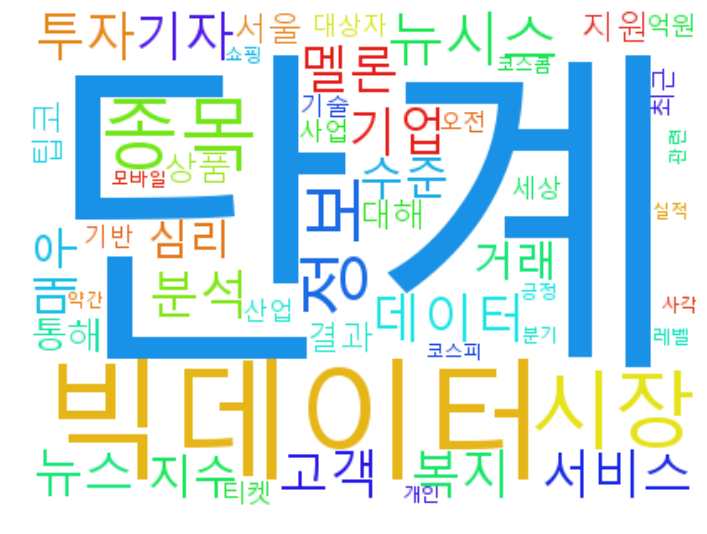

In [78]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 단어간 상관계수

In [79]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

In [80]:
word_corr

array([[ 1.        ,  0.05723556, -0.09573652, ..., -0.03881715,
         0.48229413, -0.12123059],
       [ 0.05723556,  1.        ,  0.42394952, ...,  0.46340331,
        -0.11599038, -0.11306148],
       [-0.09573652,  0.42394952,  1.        , ...,  0.54754018,
        -0.16762904, -0.16339619],
       ..., 
       [-0.03881715,  0.46340331,  0.54754018, ...,  1.        ,
        -0.09554752, -0.18254425],
       [ 0.48229413, -0.11599038, -0.16762904, ..., -0.09554752,
         1.        , -0.04911176],
       [-0.12123059, -0.11306148, -0.16339619, ..., -0.18254425,
        -0.04911176,  1.        ]])

# 상관관계 높은 것 100개만 추리기

In [81]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

In [92]:

from IPython.display import Image
Image(url="http://cfile1.uf.tistory.com/image/23369F48539A63EE1640E4")

# 위의 코드는 상단의 역삼각형 부분만 남기기 위한 로직.
# 중복되거나, 불필요한 로직 제거.

상관계수 높은 순으로 정렬

In [82]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [89]:
edges = edges[:50]
edges

[('멜론', '티켓', 0.98643277402301888),
 ('뉴시스', '코스콤', 0.97624088887718274),
 ('대상자', '복지', 0.96945996611998009),
 ('복지', '사각', 0.95816586996256481),
 ('뉴시스', '세상', 0.93449324109223186),
 ('지수', '코스콤', 0.93134183543352345),
 ('대상자', '사각', 0.91795845788283414),
 ('단계', '코스콤', 0.91792050534942116),
 ('뉴시스', '지수', 0.91398823602153001),
 ('단계', '코스피', 0.9088452469270194),
 ('레벨', '수준', 0.90688410063819114),
 ('약간', '코스콤', 0.90147164786494904),
 ('세상', '코스콤', 0.88907923617041984),
 ('단계', '매우', 0.88785610848165519),
 ('매우', '코스피', 0.88416894255087952),
 ('단계', '약간', 0.88004173404394681),
 ('심리', '코스콤', 0.87810604024902517),
 ('단계', '레벨', 0.87732957934289402),
 ('단계', '지수', 0.87432797224148251),
 ('뉴시스', '단계', 0.866960706185949),
 ('레벨', '심리', 0.86398226923530685),
 ('뉴시스', '심리', 0.86333286895628403),
 ('뉴시스', '약간', 0.85051789509935027),
 ('수준', '심리', 0.84720185012442051),
 ('단계', '심리', 0.84512793693931731),
 ('분기', '실적', 0.84342788621740994),
 ('매우', '코스콤', 0.84333207511592101),
 ('세상', '지수', 

In [100]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

[0.98643277402301888,
 0.97624088887718274,
 0.96945996611998009,
 0.95816586996256481,
 0.93449324109223186,
 0.93134183543352345,
 0.91795845788283414,
 0.91792050534942116,
 0.91398823602153001,
 0.9088452469270194,
 0.90688410063819114,
 0.90147164786494904,
 0.88907923617041984,
 0.88785610848165519,
 0.88416894255087952,
 0.88004173404394681,
 0.87810604024902517,
 0.87732957934289402,
 0.87432797224148251,
 0.866960706185949,
 0.86398226923530685,
 0.86333286895628403,
 0.85051789509935027,
 0.84720185012442051,
 0.84512793693931731,
 0.84342788621740994,
 0.84333207511592101,
 0.83968515484498762,
 0.83463303168832792,
 0.82663031168081325,
 0.81840862824535177,
 0.81706467899195245,
 0.81567627782737451,
 0.81419686544585501,
 0.8128616154274807,
 0.81214195746221329,
 0.81162566680887982,
 0.80960443604696086,
 0.80749617975329502,
 0.8015182295380413,
 0.79488545807229505,
 0.79381896136444918,
 0.79253189443198813,
 0.79125962441945574,
 0.78625386421503185,
 0.780666511215

# 상관관계 시각화

In [85]:
import networkx

In [86]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

* [spring layout](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout)
* [draw_networkx_nodes](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_nodes)
* [draw_networkx_edges](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges)
* [draw_networkx_labels](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html#networkx.drawing.nx_pylab.draw_networkx_labels)

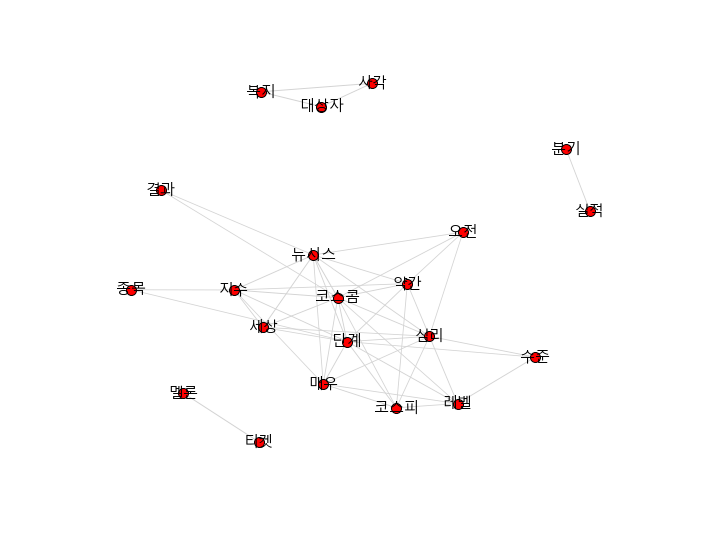

In [101]:
position = networkx.spring_layout(G, iterations=30) #좌표 계산, 여러가지 레이아웃과 좌표 강제 지정 등의 방법이 있음
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=100)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()